In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Perceptron

In [17]:
df = pd.read_csv("/placement-dataset.csv")

In [18]:
print(df.shape)
df.head()

(100, 4)


,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0


In [19]:
df.isnull().sum()

,0
city,0
cgpa,8
iq,4
placement,0


In [20]:
df.dropna(inplace=True)

In [21]:
df.shape

(88, 4)

In [22]:
del df["city"]

In [23]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
3,7.4,132.0,1
4,5.8,142.0,0
5,7.1,48.0,1


<Axes: xlabel='cgpa', ylabel='iq'>

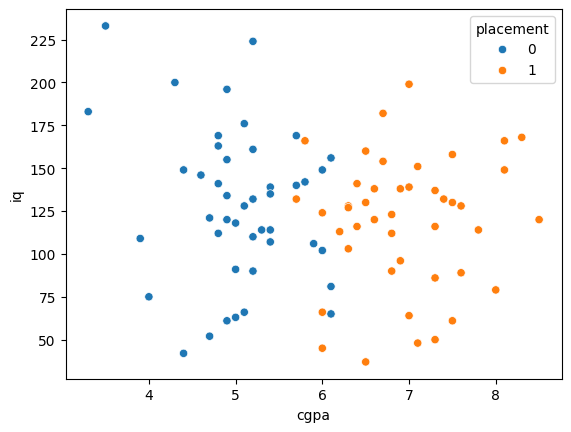

In [24]:
sns.scatterplot(x=df["cgpa"], y=df["iq"], hue=df["placement"])

In [36]:
numeric_cols = ['cgpa', 'iq']
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [37]:
df.head()

,cgpa,iq,placement
0,0.673077,0.438776,1
1,0.500000,0.352041,0
3,0.788462,0.484694,1
4,0.480769,0.535714,0
5,0.730769,0.056122,1


<Axes: xlabel='cgpa', ylabel='iq'>

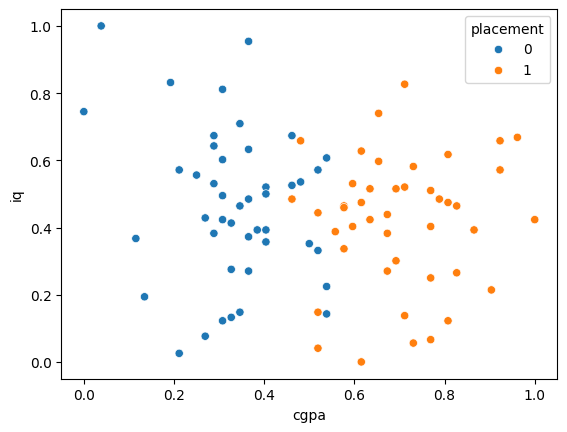

In [38]:
sns.scatterplot(x=df["cgpa"], y=df["iq"], hue=df["placement"])

In [39]:
p = Perceptron()

In [40]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [41]:
p.fit(X, y)

Perceptron()

In [42]:
p.coef_

array([[ 7.40384615, -0.98979592]])

In [43]:
p.intercept_

array([-4.])

In [44]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

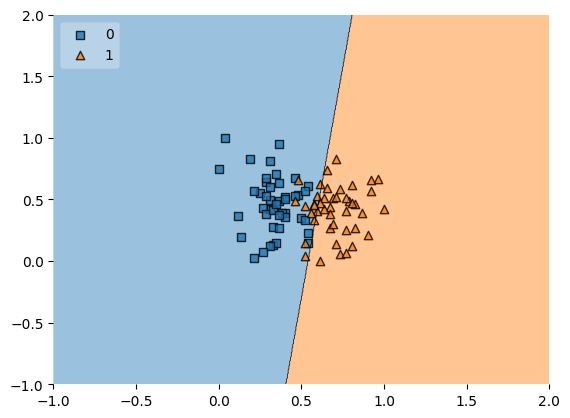

In [45]:
plot_decision_regions(X.values, y.values, clf=p, legend=2)